<font size = 3> <b> Упр.1 </b> </font>
Проверить размер встроенного типа плавающая точка и numpy.float64. т.е. берем 1 и делим на 2 пока не ноль.
\
а) x = numpy.float64(1.0), 
\
б) x = 1.0

In [1]:
import numpy as np

In [2]:
#Вывожу число итераций
def check_size(to_float):
    a=to_float(1.0)
    while(a/to_float(2.0)!=0):
        a=a/to_float(2.0)
    return a

In [3]:
def check_size_v2(to_float):
    a=to_float(1.0)
    while(to_float(1.0) + a/to_float(2.0) != to_float(1.0)):
        a/=to_float(2.0)
    return a

In [4]:
#Машинный эпсилон (Наименьшее число)
print("float: ", check_size_v2(float))
print("numpy.float32: ", check_size_v2(np.float32) )
print("numpy.float64: ", check_size_v2(np.float64) )

float:  2.220446049250313e-16
numpy.float32:  1.1920929e-07
numpy.float64:  2.220446049250313e-16


<font color="Blue"><i>Совпадает со встроенной функцией</i></font>

In [5]:
print("float: ",np.finfo(float).eps)
print("numpy.float32: ",np.finfo(np.float32).eps)
print("numpy.float64: ", np.finfo(np.float64).eps)

float:  2.220446049250313e-16
numpy.float32:  1.1920929e-07
numpy.float64:  2.220446049250313e-16


<b>Интересный факт</b>

In [6]:
#Машинный нуль - наименьшее число больше нуля (другое число)
print("float eps: ", check_size(float ))
print("eps > 0 ", check_size(float)>0.0 )
print("1.0 + eps > 1.0: ", check_size(float)+1.0>1.0 )

float eps:  5e-324
eps > 0  True
1.0 + eps > 1.0:  False


<font size = 3> <b> Упр.2 </b> </font> По массиву значений построй массив отношения текущего элемента к последующему (результирующий массив будет на один элемент меньше).

In [7]:
a = np.array( [1, 2, 3, 4])

In [8]:
a[1:]/a[:-1]

array([2.        , 1.5       , 1.33333333])

<font size = 3> <b> Упр.3 </b> </font> По массиву посчитай скользящее среднее, т.е. среднее окна из например 10 элементов. Окно скользит по массиву.

In [9]:
wsize=10

In [10]:
a = np.array( list(range(50)))

In [11]:
#k - начало периода
#wsize - размер окна
def sliding_mean(a,wsize):
    k=0
    l=[]
    while k+wsize<len(a)+1:
        l.append(a[k:k+wsize].sum()/wsize)
        k+=1 
    return l
#Длина l на выходе должна быть len(a)+1-wsize

In [12]:
#Вырожденный случай
len(a), len(sliding_mean(a, 1))

(50, 50)

In [13]:
sliding_mean(a, 10)[1], len(sliding_mean(a, 10))

(5.5, 41)

<font size = 3> <b> Упр.4 </b> </font> Нарисуй график данной прямой. Лучше поверх исходных данных.


In [14]:
import matplotlib.pyplot as plt

(-5.725, 10.225, -5.728790341298216, 2.0963122637255793)

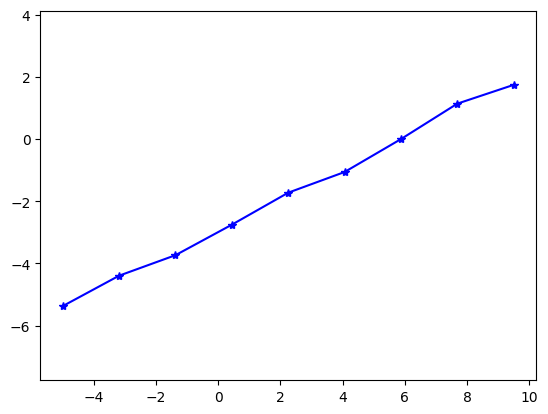

In [15]:
x = np.linspace(-5, 9.5, 9)
y = 0.5*x - 3
#Добавили шума
yy = y + np.random.randn( y.shape[0] )/3
plt.plot(x, yy, '*-b')
plt.axis('equal')

In [16]:
#решаем здесь yr=A*b (А состоит из x и единичек)
A = np.array( [np.ones_like(x), x ] ).T
b = np.linalg.pinv( (A.T).dot(A) ).dot(A.T).dot(yy)
yr=A.dot(b)
yr

array([-5.41096649, -4.50747653, -3.60398656, -2.7004966 , -1.79700664,
       -0.89351667,  0.00997329,  0.91346326,  1.81695322])

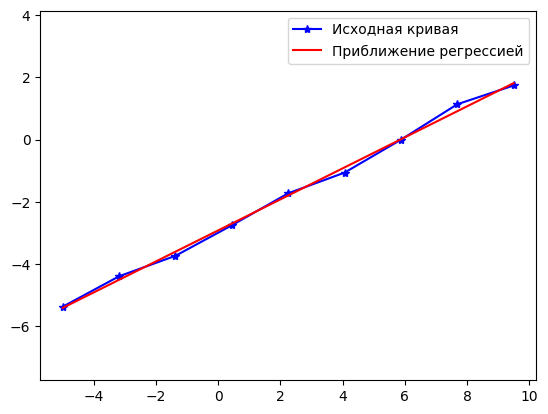

In [17]:
plt.plot(x, yy, '*-b', label = "Исходная кривая")
plt.plot(x, yr, '-r', label = "Приближение регрессией")
plt.axis('equal')
plt.legend();